In [361]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.pyplot import imshow
N=27

In [362]:
# load calibration matrix K (intrinsic)
Dir = "/home/maneesh/Desktop/Syn_Data_Genarate_from_ShipCAD_model/CyclesRenderOutput/"
K = np.loadtxt(Dir + "tmp/K.txt")
# load calibration matrix K
#Hw = np.loadtxt(Dir + "tmp/Hw.txt") #camera frame relative to world frame

#load [R|T] relative to camera frame (extrinsic parameters)  
Hw_all = np.loadtxt(Dir + "offline_saved/Hw.txt")
Hw_row = Hw_all[N-1,:]
print(Hw_row)
Hw = np.reshape(Hw_row, (3,4))
print(Hw)

#load [R|T] relative to camera frame (extrinsic parameters)  
H_all = np.loadtxt(Dir + "offline_saved/Hc.txt")
Hc_row = H_all[N-1,:]
print(Hc_row)
Hc = np.reshape(Hc_row, (3,4))
print(Hc)

#Perspective projection matrix M
M = K@Hc
print(M)
np.cos(0)

[ 0.67987166 -0.50443003  0.5322827  14.41266761  0.73333112  0.46765734
 -0.49347956 -7.63519685  0.          0.72584223  0.68786121 20.58630399]
[[ 0.67987166 -0.50443003  0.5322827  14.41266761]
 [ 0.73333112  0.46765734 -0.49347956 -7.63519685]
 [ 0.          0.72584223  0.68786121 20.58630399]]
[  0.67987166   0.73333112   0.          -4.19963679  -0.50443003
   0.46765734   0.72584223  -4.1015706    0.5322827   -0.49347956
   0.68786121 -25.59994726]
[[  0.67987166   0.73333112   0.          -4.19963679]
 [ -0.50443003   0.46765734   0.72584223  -4.1015706 ]
 [  0.5322827   -0.49347956   0.68786121 -25.59994726]]
[[ 4.07667459e+02  9.80857459e+01  2.20115589e+02 -9.65803803e+03]
 [-4.83440776e+01  4.48198194e+01  4.18471597e+02 -7.57580824e+03]
 [ 5.32282697e-01 -4.93479564e-01  6.87861215e-01 -2.55999473e+01]]


1.0

In [363]:
#world coordinates
Pw = np.array([[0,0,0,1],[0,0,1,1],[0,0,0,1],[0,1,0,1],[0,0,0,1],[1,0,0,1],[0,-3,0,1],[-3.65,-3,0,1],[3.65,-3,0,1]]) 

#pespective projection
Pc = M@Pw.T
print(Pc)
pc = Pc[0:2,:]/Pc[2,:]
print(pc)
pc[0,:] = 640-pc[0:1]
print(pc)

[[ -9658.03803239  -9437.92244369  -9658.03803239  -9559.95228649
   -9658.03803239  -9250.37057292  -9952.29527007 -11440.28149711
   -8464.30904302]
 [ -7575.80823941  -7157.33664254  -7575.80823941  -7530.98842005
   -7575.80823941  -7624.15231705  -7710.26769748  -7533.8118141
   -7886.72358086]
 [   -25.59994726    -24.91208605    -25.59994726    -26.09342683
     -25.59994726    -25.06766457    -24.11950857    -26.06234042
     -22.17667673]]
[[377.2678878  378.84914273 377.2678878  366.37396649 377.2678878
  369.01605045 412.62429703 438.95833272 381.67617025]
 [295.93061896 287.30378613 295.93061896 288.61630439 295.93061896
  304.14290475 319.66935287 289.06888994 355.63144456]]
[[262.7321122  261.15085727 262.7321122  273.62603351 262.7321122
  270.98394955 227.37570297 201.04166728 258.32382975]
 [295.93061896 287.30378613 295.93061896 288.61630439 295.93061896
  304.14290475 319.66935287 289.06888994 355.63144456]]


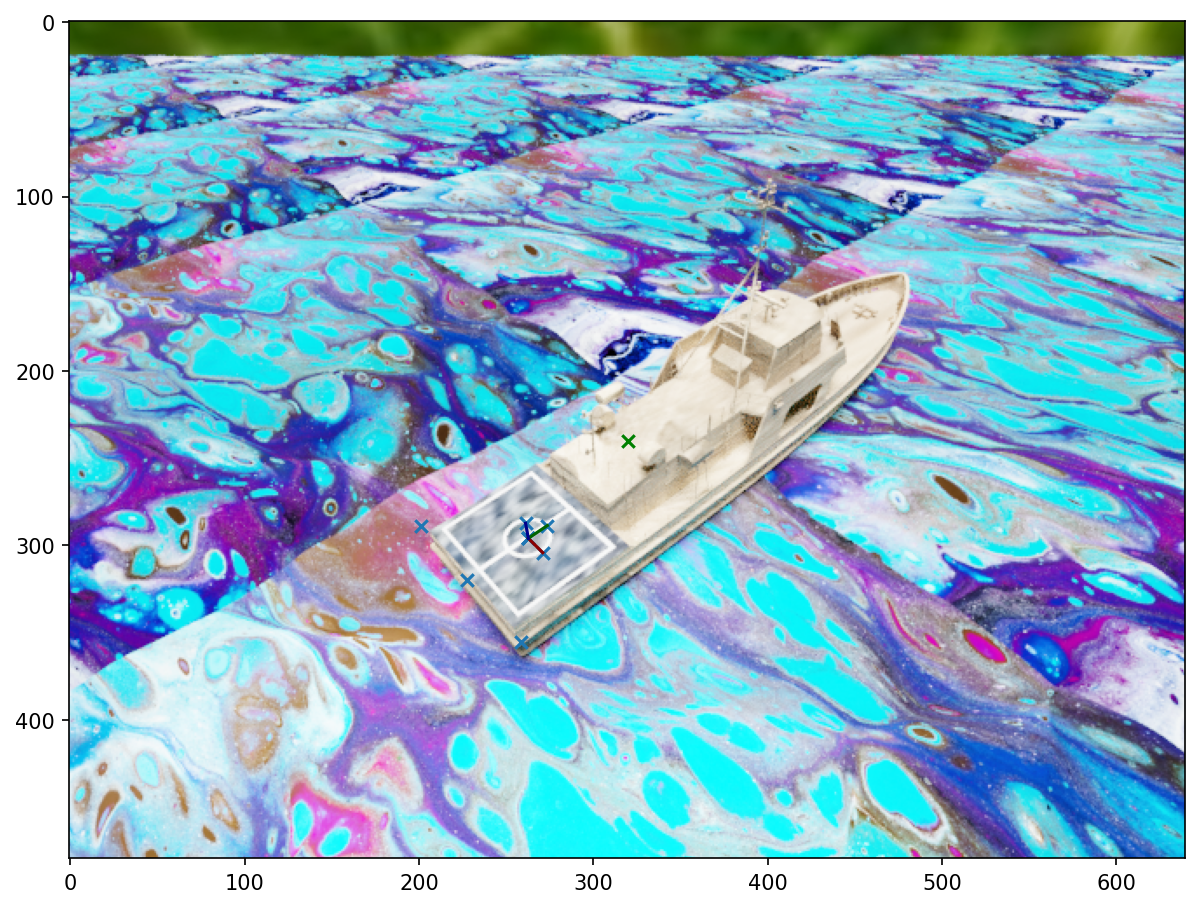

In [364]:
filename = "/home/maneesh/Desktop/Syn_Data_Genarate_from_ShipCAD_model/CyclesRenderOutput/offline_saved/Train/"
image = cv2.imread(filename+"{:06}.png".format(N))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(9.6,12.8),dpi = 150)


plt.plot(pc[0,4:6], pc[1,4:6], markersize=1, color="darkred")
plt.plot(pc[0,2:4], pc[1,2:4], markersize=1, color="darkgreen")
plt.plot(pc[0,0:2], pc[1,0:2], markersize=1,color="darkblue")

plt.scatter(320, 240,marker="x", color = "green")
plt.scatter(pc[0,:], pc[1,:],marker="x")
imshow(image)

In [365]:
UV_save = np.loadtxt(Dir + "offline_saved/UV.txt")
UV_fix = np.reshape(UV_save[N-1,:], (2,UV_save.shape[1]//2))
print(UV_fix)
pc = UV_fix

[[262.7321122  261.15085727 262.7321122  273.62603351 262.7321122
  270.98394955 227.37570297 201.04166728 258.32382975]
 [295.93061896 287.30378613 295.93061896 288.61630439 295.93061896
  304.14290475 319.66935287 289.06888994 355.63144456]]


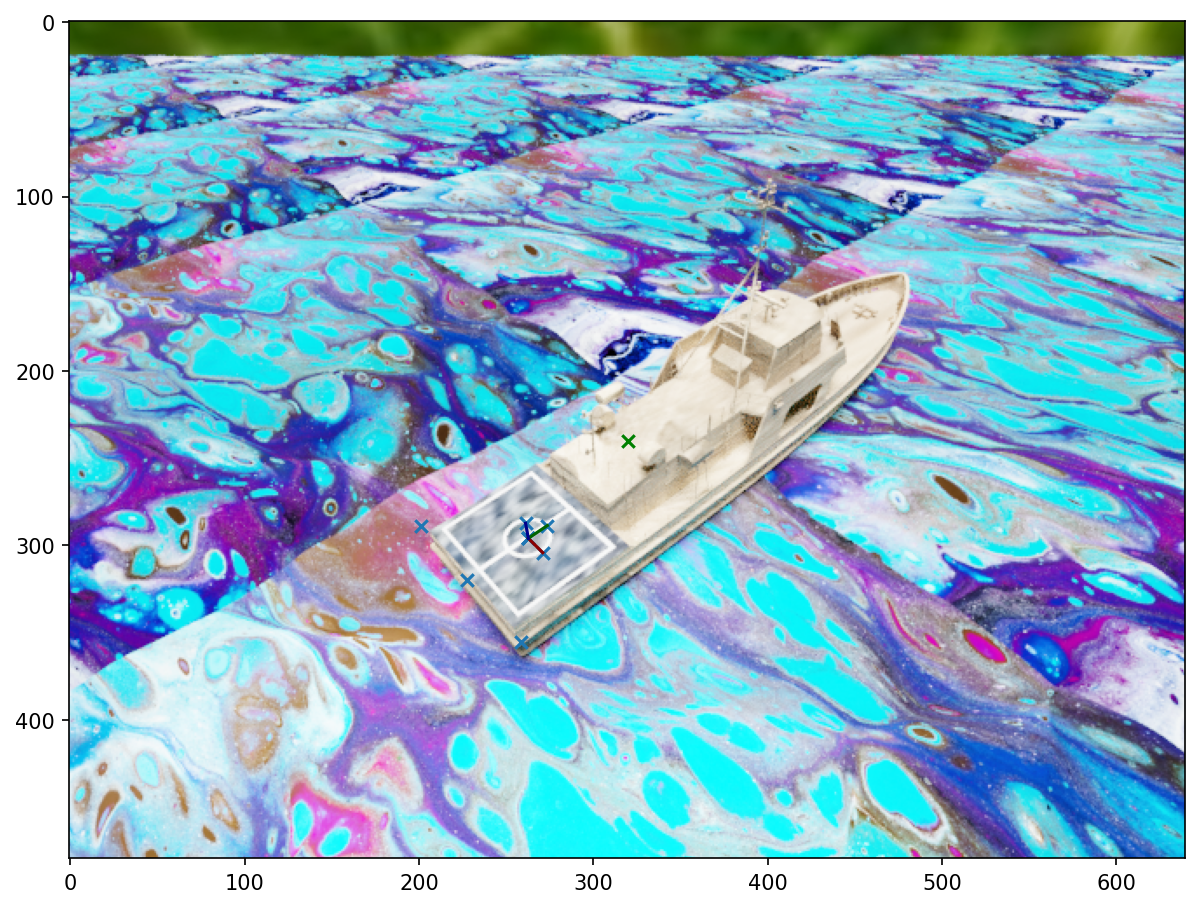

In [366]:
filename = "/home/maneesh/Desktop/Syn_Data_Genarate_from_ShipCAD_model/CyclesRenderOutput/offline_saved/Train/"
image = cv2.imread(filename+"{:06}.png".format(N))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(9.6,12.8),dpi = 150)


plt.plot(pc[0,4:6], pc[1,4:6], markersize=1, color="darkred")
plt.plot(pc[0,2:4], pc[1,2:4], markersize=1, color="darkgreen")
plt.plot(pc[0,0:2], pc[1,0:2], markersize=1,color="darkblue")

plt.scatter(320, 240,marker="x", color = "green")
plt.scatter(pc[0,:], pc[1,:],marker="x")
imshow(image)